# Investigating Data with `pandas`
_Renaissance EXL_  
_Renaissance Learning, 2023_  
  
Now that we know the basics of Python and Jupyter Notebooks, let's see how we can begin to investigate data sets.

## Today's Session

1. Housekeeping    

 2. Data and data types

3. Data transformations and operations with `pandas`
    - Subsetting data
    - Data types and transforming data
    - Cleaning data - null handling and allowed values
    - Functions and calculations on columns
    - Commenting and pseudo-code  

4. Data visualization for analysis
    - Scatter Plots
    - Histograms
    - Bar plots

5. Wrap up

## Housekeeping

If you haven't already...
- Send me your photo release form

## Overview

### Data

Data can generally be accessed in three ways:

1. Read from a file

2. Queried from a database

3. Loaded from an event stream

The second two are more complex because they require specific connections. This notebook looks at the simplest case: reading data from a file. Database connections and event streams will come along later.

#### Data files

Typically we'll encounter data files in the following formats. This is not an exhaustive list– just the most common data structures and file types.
- **Relational:** data stored in tables
    1. Comma-separated values (`.csv`)
    2. Tab-separated values (`.tsv`)
    3. Excel document (`.xlsx`, `.xls`)

- **Non-relational:** data stored in less-structured format
    1. Javascript object notation (`.json`)
    2. Extensible Markup Language (`.xml`)    

With the exception of Excel spreadsheets, these data files are just plain text. They can usually be opened in any text editor, like vim, emacs, TextEdit, Atom, Sublime Text. In most cases when you see data that uses any of these formats, the file will have an extension indicating that format. In some cases, though, you could see a text file that ends in a more generic extension like `.txt`, which only tells you that it's text, but doesn't tell you the *structure* of the data. You'll need to open the file to determine how it is structured, and thus how to load it properly.

### `pandas`

[`pandas`](https://pandas.pydata.org/) is a Python library designed to work with data. In their words:
> **pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. [pydata.org](https://pandas.pydata.org/)  

It's not an understatement to say that it is *the* essential data libary for Python. There are other tools out there, but few are as convenient, powerful, or intuitive. We'll use it in pretty much any data research project that uses Python.  
  
This tutorial just scratches the surface of what the `pandas` library can do. I often refer back to the [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) to remind myself of some other things the library can do for me. 

## Getting started

Besides Excel files, `csv` files are the most common format we're likely to encounter. Let's start by using `pandas` to read a `csv` file that is included with this repository.

### Step 1. Import `pandas`

`pandas` is not a built-in library, so we have to import it into the kernel. We only have to run this code once and then we'll be able to reference the library's classes, methods, objects, etc.. To keep our code organized, it's good practice to import all of the necessary libraries at the top of the Python script or Jupyter Notebook.  
There are a few other libraries that we need in this notebook, so let's import them all right now.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

N.B. Any time we have code that uses a library like `pandas`, we'll need to reference the library. Adding `as ...` after each `import` statements is a common convention that saves us extra typing later on.

### Step 2. Read file
Remember from the previous tutorial that we can instantiate a new variable to hold the data object using the assignment operator.

In [8]:
people = pd.read_csv('../data/people.csv')
print(type(people))

<class 'pandas.core.frame.DataFrame'>


The `print` statement above shows us that the `read_csv` method returned an object of type `pandas.core.frame.DataFrame`, or just `DataFrame` for short. A `DataFrame` is a table, arranged as a series of columns. Other common objects in `pandas` include `Series` and `GroupBy`. Each column in a `DataFrame` is a `Series`.

In Jupyter, the `display` function can be more useful than `print` function when viewing certain types of objects. Let's look at the difference:

In [3]:
print(people)

      name  age  height         occupation       pets
0  Candace   37      60             Singer        cat
1    Larry   35      68         Journalist       None
2     Raul   45      71  Software Designer     iguana
3     Bart   12      38            Student  dog, bird
4   George   25      62  Interior Designer        dog


In [4]:
display(people)

,name,age,height,occupation,pets
0,Candace,37,60,Singer,cat
1,Larry,35,68,Journalist,None
2,Raul,45,71,Software Designer,iguana
3,Bart,12,38,Student,"dog, bird"
4,George,25,62,Interior Designer,dog


First, you'll notice that both commands show a table of data, and also show a count of the number of rows and columns. Within Jupyter, both commands are also careful to not show *all* of the data. By default, when looking at a large DataFrame, only the first 5 and last 5 rows will be displayed. The number of columns displayed may also be reduced.

You'll also notice that `display` just looks better. Instead of plain text, it shows the table using `HTML` decorated by Jupyter's own `css` styles. This allows for **bold** index values, alternating row colors, and highlighting of each row as you hover over, for example.

## Examining Data
Important methods

### Subsetting data
Filter by column values

In [9]:
people[people['age'] > 30]

,name,age,height,occupation,pets
0,Candace,37,60,Singer,cat
1,Larry,35,68,Journalist,None
2,Raul,45,71,Software Designer,iguana


In [10]:
people[people['occupation'] == 'Singer']

,name,age,height,occupation,pets
0,Candace,37,60,Singer,cat


In [11]:
people[people['occupation'].str.contains('Designer')]

,name,age,height,occupation,pets
2,Raul,45,71,Software Designer,iguana
4,George,25,62,Interior Designer,dog


#### Conditions can be combined using  

| join | symbol |
|------|--------|
| and  | `&`    |
| or   | `\|`   |  
  
Each condition should enclosed in parentheses.

In [12]:
people[(people['age'] < 40) & (people['height'] < 60)]

,name,age,height,occupation,pets
3,Bart,12,38,Student,"dog, bird"


In [13]:
people[(people['age'] < 40) | (people['height'] < 60)]

,name,age,height,occupation,pets
0,Candace,37,60,Singer,cat
1,Larry,35,68,Journalist,None
3,Bart,12,38,Student,"dog, bird"
4,George,25,62,Interior Designer,dog


There are many other ways to create filters and subsets of your dataset. See the official `pandas` User Guide page on [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#query-python-versus-pandas-syntax-comparison) for more options.

### Data types and transforming data

Let's look at some population data from a [dataset](https://www.kaggle.com/datasets/muhammedtausif/world-population-by-countries) found on [kaggle.com](kaggle.com)

In [14]:
population = pd.read_csv('../data/world-population-by-country-2020-with-nulls.csv')
display(population.head())
print(population.shape)

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",N.A.,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",NaN,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",N.A.,"1,811,570",NaN,2.3,NaN,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


(235, 12)


Let's calculate the median population of all of the countries

In [15]:
population['Population 2020'].median()

TypeError: could not convert string to float: '1,439,323,776'

Hmm... something's not right... 🤔

In [16]:
population.dtypes

no                          int64
Country (or dependency)    object
Population 2020            object
Yearly Change              object
Net Change                 object
Density  (P/Km²)           object
Land Area (Km²)            object
Migrants (net)             object
Fert. Rate                 object
Med. Age                   object
Urban Pop %                object
World Share                object
dtype: object

> The datatype for `Population 2020` column is object, not number.

In the file, the actual data looks like this:
```
no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density  (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",N.A.,38,61%,18.47%
2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
```

Notice the quotes around the numbers, and the percentage values. We need to change these into values that Python will recognize as actual numbers.  
Start by converting the "`Population 2020`" to numeric

In [17]:
population['Population 2020'] = population['Population 2020'].astype(float)

ValueError: could not convert string to float: '1,439,323,776'

Oh no! Converting text strings to numbers isn't always so easy. The commas need to go...

In [18]:
def cast_to_number(some_text):
    """converts a string to a number by removing commas and percentage signs
    """
    if isinstance(some_text, float):  # already a number!
        return some_text
    no_commas = some_text.replace(',', '')
    no_percent = no_commas.replace('%', '')
    number = float(no_percent)
    return number

In [19]:
population['Population 2020'] = population['Population 2020'].apply(cast_to_number)

Yes, it worked!  
Now we can finally calculate the median population...

In [20]:
population['Population 2020'].median()

5459642.0

### Cleaning data
Null handling and allowed values

Our data set has some *Null* values. A null value is an indicator that the data is missing.

In [21]:
population[population['Med. Age'].isnull()]

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
3,4,Indonesia,273523615.0,1.07%,"2,898,047",N.A.,"1,811,570",NaN,2.3,NaN,56%,3.51%
111,112,El Salvador,6486205.0,0.51%,"32,652",313,"20,720","-40,539",2.1,NaN,73%,0.08%
125,126,New Zealand,4822233.0,0.82%,"39,170",18,"263,310","14,881",1.9,NaN,87%,0.06%
163,164,Guyana,786552.0,0.48%,"3,786",4,"196,850","-6,000",2.5,NaN,27%,0.01%


In [22]:
population['Med. Age'].median()

TypeError: could not convert string to float: 'N.A.'

Sometimes, as in this case, missing values are indicated with a string. We might see `"n/a"`, `"missing"`,  `"N.A."`, etc.  

Python's `pandas` library uses `np.nan` to represent null values.

In [23]:
population = population.replace('N.A.', np.nan)

With the strings converted to `np.nan`, we can now calculate the median

In [24]:
population['Med. Age'].median()

30.0

### Functions and calculations on columns

Let's convert the rest of the columns to numeric type. We can use a `for` loop to go over all of the columns:

In [25]:
for c in population.columns:
    try:
        population[c] = population[c].apply(cast_to_number)
    except:
        pass

#### Summarize data
Methods for a single Series / column:

In [26]:
print('Sum of values in column A:       ', population['Population 2020'].sum())
print('Min of values in column A:       ', population['Population 2020'].min())
print('Max of values in column A:       ', population['Population 2020'].max())
print('Mean of values in column A:      ', population['Population 2020'].mean())
print('Std. Dev. of values in column A: ', population['Population 2020'].std())

Sum of values in column A:        7795232630.0
Min of values in column A:        801.0
Max of values in column A:        1439323776.0
Mean of values in column A:       33171202.680851065
Std. Dev. of values in column A:  135136985.2834009


In [27]:
print('\nList unique values in column A:')
print(population['Country (or dependency)'].unique())


List unique values in column A:
['China' 'India' 'United States' 'Indonesia' 'Pakistan' 'Brazil' 'Nigeria'
 'Bangladesh' 'Russia' 'Mexico' 'Japan' 'Ethiopia' 'Philippines' 'Egypt'
 'Vietnam' 'DR Congo' 'Turkey' 'Iran' 'Germany' 'Thailand'
 'United Kingdom' 'France' 'Italy' 'Tanzania' 'South Africa' 'Myanmar'
 'Kenya' 'South Korea' 'Colombia' 'Spain' 'Uganda' 'Argentina' 'Algeria'
 'Sudan' 'Ukraine' 'Iraq' 'Afghanistan' 'Poland' 'Canada' 'Morocco'
 'Saudi Arabia' 'Uzbekistan' 'Peru' 'Angola' 'Malaysia' 'Mozambique'
 'Ghana' 'Yemen' 'Nepal' 'Venezuela' 'Madagascar' 'Cameroon'
 "Côte d'Ivoire" 'North Korea' 'Australia' 'Niger' 'Taiwan' 'Sri Lanka'
 'Burkina Faso' 'Mali' 'Romania' 'Malawi' 'Chile' 'Kazakhstan' 'Zambia'
 'Guatemala' 'Ecuador' 'Syria' 'Netherlands' 'Senegal' 'Cambodia' 'Chad'
 'Somalia' 'Zimbabwe' 'Guinea' 'Rwanda' 'Benin' 'Burundi' 'Tunisia'
 'Bolivia' 'Belgium' 'Haiti' 'Cuba' 'South Sudan' 'Dominican Republic'
 'Czech Republic (Czechia)' 'Greece' 'Jordan' 'Portugal' 'Azer

You can also use `sorted()` around unique values, which may be easier to parse.

In [28]:
print(sorted(population['Country (or dependency)'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic (Czechia)', "Côte d'Ivoire", 'DR Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French

In [29]:
print('\nMultiple stats for values in column A:')
print(population['Population 2020'].describe())


Multiple stats for values in column A:
count    2.350000e+02
mean     3.317120e+07
std      1.351370e+08
min      8.010000e+02
25%      4.188015e+05
50%      5.459642e+06
75%      2.057705e+07
max      1.439324e+09
Name: Population 2020, dtype: float64


In many cases, the same method that can be used to summarize a single column can be used to summarize *all* columns in a DataFrame, simply by typing the method after DataFrame itself:

In [30]:
print(population.describe())

               no  Population 2020  Yearly Change    Net Change  \
count  235.000000     2.350000e+02     235.000000  2.340000e+02   
mean   118.000000     3.317120e+07       1.104298  3.352564e+05   
std     67.982841     1.351370e+08       1.075665  1.118321e+06   
min      1.000000     8.010000e+02      -2.470000 -3.838400e+05   
25%     59.500000     4.188015e+05       0.320000  4.115000e+02   
50%    118.000000     5.459642e+06       0.970000  3.845600e+04   
75%    176.500000     2.057705e+07       1.850000  2.306372e+05   
max    235.000000     1.439324e+09       3.840000  1.358663e+07   

       Density  (P/Km²)  Land Area (Km²)  Migrants (net)  Fert. Rate  \
count        233.000000     2.340000e+02      199.000000  200.000000   
mean         481.712446     5.546489e+05      542.015075    2.697000   
std         2341.028294     1.691336e+06   123710.229698    1.265464   
min            0.000000     0.000000e+00  -653249.000000    1.100000   
25%           38.000000     2.522500

#### Creating new columns
Let's calculate population density in square miles...  
  
We have some useful measures already:

In [31]:
population[['Population 2020', 'Land Area (Km²)', 'Density  (P/Km²)']].head(3)

,Population 2020,Land Area (Km²),Density (P/Km²)
0,1.439324e+09,9388211.0,153.0
1,1.380004e+09,2973190.0,464.0
2,3.310027e+08,9147420.0,NaN


How to approach the task...
1. Convert km² to mi²
2. Divide population by mi²

In [32]:
# fix those commas first
population['Land Area (Km²)'] = population['Land Area (Km²)'].apply(cast_to_number)

# then convert values
population['Land Area (mi²)'] = population['Land Area (Km²)'] * 0.386102 # sq. miles / sq. km

In [33]:
population['Density  (P/mi²)'] = population['Population 2020'] / population['Land Area (mi²)']

In [39]:
population[['Country (or dependency)', 'Density  (P/mi²)']].sample(2)

,Country (or dependency),Density (P/mi²)
21,France,308.749019
231,Falkland Islands,0.740605


### Commenting and pseudo-code

Comments in your code are important! They explain not only what your code does, but more importantly, **why you chose to do it that way.**

In-line comments are preceded by a `#` character. All characters following the `#` are ignored by interpreter
```python

data['group'] = 'A'     # All values in the dataframe belong to group A. Will join on other datasets later.


```

Multi-line comments are wrapped in 3 quotation characters, either single or double.  
The interpreter ignores all text between the triple-quotes.

In [40]:
"""
This is a multiline comment. It is useful when
I have a lot to say and want to make sure it all
stays visible.

    
x = 8   <- this code will not run because it is in a comment

"""

x = 9     # <- this code will run because it is outside of the quotes
print(x)

9


 Functions have what is known as a `docstring`, which is a special comment that is shown to a user of that function

In [41]:
def new_function(x):
    """
    This function takes a value x, which must be a string, and 
    returns the number of characters in the string
    """
    
    assert(isinstance(x, str))
    return len(x)

In [ ]:
new_function()

Special comment types: `TODO` and `FIXME`

In [42]:
list_of_numbers = [7, 8, 'nine']

np.mean(list_of_numbers) # FIXME: ensure all elements of list are of numeric type

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> None

Markdown cells around code cells are useful, but you should use comments in code as well
- Not all code is in a notebook, so you won't always have Markdown cells
- Docstrings and other special comments are standardized, and are used by Python to show you useful details
- It's a good habit to make your code more understandable to yourself and others


## Data visualization

Data visualization is vitally important for understanding our data. To determine how it is spread, we are likly to use **scatter plots**, **bar plots**, and **histograms**.

### Scatter plots
Plotting 2-3 several variables against one another on an set of x-y(-z) axes.

Ensure all columns are numeric

Make the graph

<AxesSubplot:xlabel='Yearly Change', ylabel='Fert. Rate'>

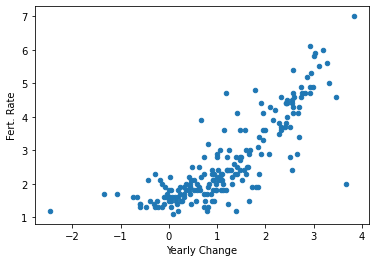

In [43]:
population.plot.scatter(x='Yearly Change', y='Fert. Rate')

We can also customize the graph with a few additional parameters, making it easier to understand

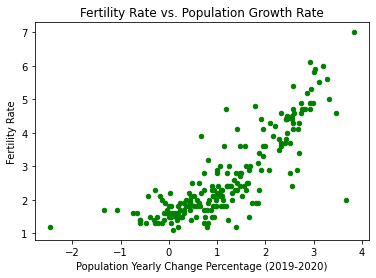

In [44]:
population.plot.scatter(
    x='Yearly Change', y='Fert. Rate', 
    color='green',
    title='Fertility Rate vs. Population Growth Rate',
    xlabel='Population Yearly Change Percentage (2019-2020)',
    ylabel='Fertility Rate'
);      # adding a ";" after a call to `plot` hides the plot object description

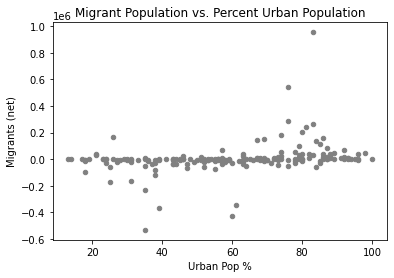

In [45]:
population.plot.scatter(
    x='Urban Pop %', y='Migrants (net)', 
    color='grey', 
    title='Migrant Population vs. Percent Urban Population'
);

### Histogram
For showing the distribution (range of values) for a single variable

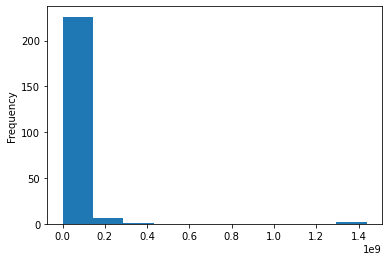

In [46]:
population['Population 2020'].plot.hist();

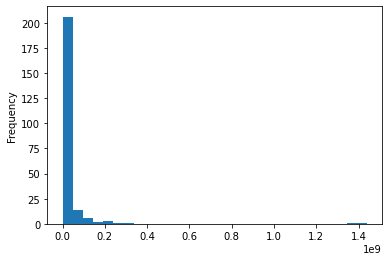

In [47]:
population['Population 2020'].plot.hist(bins=30);

Zoom in on all of those countries with population < 3,000,000

<AxesSubplot:ylabel='Frequency'>

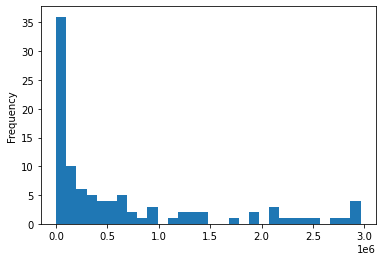

In [48]:
display(population[population['Population 2020'] < 3_000_000]['Population 2020'].plot.hist(bins=30));

<AxesSubplot:ylabel='Frequency'>

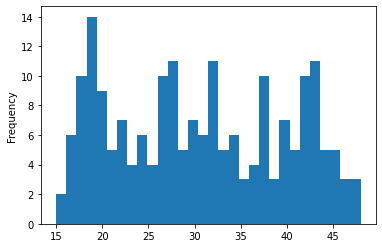

In [49]:
display(population['Med. Age'].plot.hist(bins=30));

### Bar Plot
Better for plotting **Categorical** data, rather than **Numeric**.  

In this population data set, nearly all values are numeric (-ish), so let's create some categories.

In [50]:
def categorize_age(median_age):
    if median_age <= 25: return 'younger'
    elif median_age < 37: return 'average'
    elif median_age >= 37: return 'older'
    else: return np.nan

population['Median Age (binned)'] = population['Med. Age'].apply(categorize_age)
display(population[['Country (or dependency)', 'Population 2020', 'Med. Age', 'Median Age (binned)']].sample(10))

,Country (or dependency),Population 2020,Med. Age,Median Age (binned)
71,Chad,16425864.0,17.0,younger
233,Tokelau,1357.0,NaN,NaN
16,Turkey,84339067.0,32.0,average
97,Papua New Guinea,8947024.0,22.0,younger
87,Jordan,10203134.0,24.0,younger
201,Isle of Man,85033.0,NaN,NaN
169,Western Sahara,597339.0,28.0,average
88,Portugal,10196709.0,46.0,older
184,New Caledonia,285498.0,34.0,average
147,North Macedonia,2083374.0,39.0,older


In [51]:
age_data = population.groupby('Median Age (binned)').size().reset_index().rename(columns={0:'n_countries'})
display(age_data)

,Median Age (binned),n_countries
0,average,68
1,older,62
2,younger,67


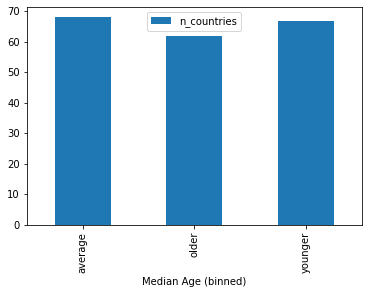

In [52]:
age_data.plot.bar(x='Median Age (binned)', y='n_countries');

The default plot is fine, but we can make this a little prettier...

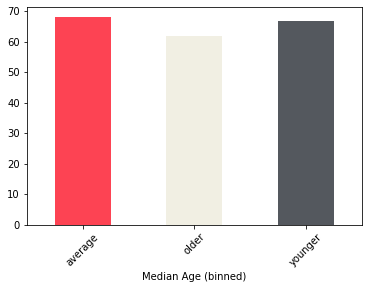

In [53]:
age_data.plot.bar(
    x='Median Age (binned)', y='n_countries',
    legend=None,                                # remove that unhelpful legend
    rot=45,                                     # rotation angle of x-axis labels, 45 degrees
    color=['#FD4353', '#F1EFE3', '#54585E']     # custom Renaissance brand colors using hex-code
);

## Wrap Up
### Todos

1. Examine one or more of your data sets

2. Calculate statistics on some key data fields

3. Create 3 or more graphs of your dataset

4. Start collecting your ideas into your paper outline

5. Post a link to your GitHub account Slack

6. Post an example of your work in our Slack's `#python` channel. Can be data cleaning, statistical analysis, or a graph

7. Share a short summary (5-10 sentences) of your research progress so far in the `#research` channel on Slack

- If you haven't done it yet, send me your photo release form